In [3]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from plate_notplate_dataset import plate_notplate_dataset
import torchvision.transforms as transforms
from model import Yolov1

<class 'PIL.Image.Image'>
<class 'torch.Tensor'>


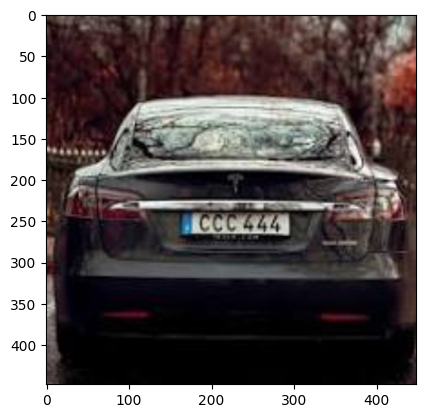

In [182]:
# img = Image.open("C:\\Users\\Asus\\Desktop\\Projects\\licence plate detection\\plates_image\\Cars12.png").convert("RGB")
img = Image.open("C:\\Users\\Asus\\Desktop\\Projects\\licence plate detection\\plate1.jfif").convert("RGB")
print(type(img))
transform = transforms.Compose([
    transforms.Resize((448, 448)),
    transforms.ToTensor(),
    ])
img = transform(img)
plt.imshow(img.permute(1,2,0).numpy())
print(type(img))
plt.show()

In [183]:
# DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE = "cpu"
model = Yolov1(
    split_size=7 , num_boxes=2 ,num_classes=1
).to(DEVICE)

In [184]:
model.load_state_dict(torch.load("C:\\Users\\Asus\\Desktop\\Projects\\licence plate detection\\plate_detection.pth"))

<All keys matched successfully>

In [188]:
# import torch
# from collections import Counter
# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib.patches as patches
# def intersection_over_union(boxes_perds , boxes_labels , box_format= "midpoints"):
#     """
#     calculate the IoU
#     params : 
#         box_preds (tensor): prediction of bounding boxes (BATCH_SIZE , 4)
#         box_labels (tensor): correct labels of bounding boxes (BATCH_SIZE, 4)
#         box_format (str) : midpoint/corner  if the boxes (x,y,w,h) or (x1,y1,x2,y2)
#     return :
#         IoU of all batch members
#     """
    
    
    
#     # boxes_preds shape is (N , 4) where N is the number of bounding boxes
#     # boxes_labels shape is (N , 4) where N is the number of bounding boxes
    
#     if box_format== "corners":
#         box1_x1 = boxes_perds[... , 0:1]
#         box1_y1 = boxes_perds[... , 1:2]
#         box1_x2 = boxes_perds[... , 2:3]
#         box1_y2 = boxes_perds[... , 3:4] 
#         # for making it's shape remaine as (N,1)
#         # not slicing it like boxes_perds[... , 3] because it give us the (N) shape
        
#         box2_x1 = boxes_labels[... , 0:1]
#         box2_y1 = boxes_labels[... , 1:2]
#         box2_x2 = boxes_labels[... , 2:3]
#         box2_y2 = boxes_labels[... , 3:4]

#     else:
#         box1_x1 = boxes_perds[... , 0:1] - boxes_perds[... , 2:3]/2
#         box1_y1 = boxes_perds[... , 1:2] - boxes_perds[... , 3:4]/2
#         box1_x2 = boxes_perds[... , 0:1] + boxes_perds[... , 2:3]/2
#         box1_y2 = boxes_perds[... , 1:2] + boxes_perds[... , 3:4]/2

#         box2_x1 = boxes_labels[... , 0:1] - boxes_labels[... , 2:3]/2
#         box2_y1 = boxes_labels[... , 1:2] - boxes_labels[... , 3:4]/2
#         box2_x2 = boxes_labels[... , 0:1] + boxes_labels[... , 2:3]/2
#         box2_y2 = boxes_labels[... , 1:2] + boxes_labels[... , 3:4]/2

        
#     x1 = torch.max(box1_x1 , box2_x1)
#     y1 = torch.max(box1_y1 , box2_y1)
#     x2 = torch.min(box1_x2 , box2_x2)
#     y2 = torch.min(box1_y2 , box2_y2)

#     # .clamp(0) is for time they do not intersect
#     intersection = (x2-x1).clamp(0) * (y2-y1)

#     box1_area = abs((box1_x2 - box1_x1) * (box1_y2 - box1_y1))
#     box2_area = abs((box2_x2 - box2_x1) * (box2_y2 - box2_y1))

#     return intersection / (box1_area + box2_area - intersection + 1e-6) #add 1e-6 for numerical stability

# def mean_average_precision(
#     pred_boxes, true_boxes, iou_threshold=0.5, box_format="midpoint", num_classes=20
# ):
#     """
#     Calculates mean average precision 

#     Parameters:
#         pred_boxes (list): list of lists containing all bboxes with each bboxes
#         specified as [train_idx, class_prediction, prob_score, x1, y1, x2, y2]
#         true_boxes (list): Similar as pred_boxes except all the correct ones 
#         iou_threshold (float): threshold where predicted bboxes is correct
#         box_format (str): "midpoint" or "corners" used to specify bboxes
#         num_classes (int): number of classes

#     Returns:
#         float: mAP value across all classes given a specific IoU threshold 
#     """

#     # list storing all AP for respective classes
#     average_precisions = []

#     # used for numerical stability later on
#     epsilon = 1e-6

#     for c in range(num_classes):
#         detections = []
#         ground_truths = []

#         # Go through all predictions and targets,
#         # and only add the ones that belong to the
#         # current class c
#         for detection in pred_boxes:
#             if detection[1] == c:
#                 detections.append(detection)

#         for true_box in true_boxes:
#             if true_box[1] == c:
#                 ground_truths.append(true_box)

#         # find the amount of bboxes for each training example
#         # Counter here finds how many ground truth bboxes we get
#         # for each training example, so let's say img 0 has 3,
#         # img 1 has 5 then we will obtain a dictionary with:
#         # amount_bboxes = {0:3, 1:5}
#         amount_bboxes = Counter([gt[0] for gt in ground_truths])

#         # We then go through each key, val in this dictionary
#         # and convert to the following (w.r.t same example):
#         # ammount_bboxes = {0:torch.tensor[0,0,0], 1:torch.tensor[0,0,0,0,0]}
#         for key, val in amount_bboxes.items():
#             amount_bboxes[key] = torch.zeros(val)

#         # sort by box probabilities which is index 2
#         detections.sort(key=lambda x: x[2], reverse=True)
#         TP = torch.zeros((len(detections)))
#         FP = torch.zeros((len(detections)))
#         total_true_bboxes = len(ground_truths)
        
#         # If none exists for this class then we can safely skip
#         if total_true_bboxes == 0:
#             continue

#         for detection_idx, detection in enumerate(detections):
#             # Only take out the ground_truths that have the same
#             # training idx as detection
#             ground_truth_img = [
#                 bbox for bbox in ground_truths if bbox[0] == detection[0]
#             ]

#             num_gts = len(ground_truth_img)
#             best_iou = 0

#             for idx, gt in enumerate(ground_truth_img):
#                 iou = intersection_over_union(
#                     torch.tensor(detection[3:]),
#                     torch.tensor(gt[3:]),
#                     box_format=box_format,
#                 )

#                 if iou > best_iou:
#                     best_iou = iou
#                     best_gt_idx = idx

#             if best_iou > iou_threshold:
#                 # only detect ground truth detection once
#                 if amount_bboxes[detection[0]][best_gt_idx] == 0:
#                     # true positive and add this bounding box to seen
#                     TP[detection_idx] = 1
#                     amount_bboxes[detection[0]][best_gt_idx] = 1
#                 else:
#                     FP[detection_idx] = 1

#             # if IOU is lower then the detection is a false positive
#             else:
#                 FP[detection_idx] = 1

#         TP_cumsum = torch.cumsum(TP, dim=0)
#         FP_cumsum = torch.cumsum(FP, dim=0)
#         recalls = TP_cumsum / (total_true_bboxes + epsilon)
#         precisions = TP_cumsum / (TP_cumsum + FP_cumsum + epsilon)
#         precisions = torch.cat((torch.tensor([1]), precisions))
#         recalls = torch.cat((torch.tensor([0]), recalls))
#         # torch.trapz for numerical integration
#         average_precisions.append(torch.trapz(precisions, recalls))

#     return sum(average_precisions) / len(average_precisions)

# def non_max_suppression(
#         bboxes ,
#         iou_threshold,
#         threshold,
#         box_format = "corners"
# ):
#     # predictions = [ [class label , prediction of that class,  x1,y1,x2,y2] ,[] ,[]]

#     assert type(bboxes) == list
#     bboxes =  [box for box in bboxes if box[1] > threshold]
#     bboxes = sorted(bboxes , key=lambda x: x[1] , reverse=True)
#     bboxes_afer_nms = []

#     while bboxes :
#         chosen_box = bboxes.pop(0)

#         bboxes = [box for box  in bboxes if box[0] != chosen_box[0]
#                   or intersection_over_union(
#                     boxes_perds=torch.tensor(chosen_box[2:]),
#                     boxes_labels=torch.tensor(box[2:]),
#                     box_format=box_format) < iou_threshold
#                 ]
#         bboxes_afer_nms .append(chosen_box)

#     return bboxes_afer_nms

# def plot_image(image, boxes):
#     """Plots predicted bounding boxes on the image"""
#     im = np.array(image)
#     height, width, _ = im.shape 

#     # Create figure and axes
#     fig, ax = plt.subplots(1)
#     # Display the image
#     ax.imshow(im)

#     # box[0] is x midpoint, box[2] is width
#     # box[1] is y midpoint, box[3] is height

#     # Create a Rectangle potch
#     for box in boxes:
#         box = box[2:]
#         assert len(box) == 4, "Got more values than in x, y, w, h, in a box!"
#         upper_left_x = box[0] - box[2] / 2
#         upper_left_y = box[1] - box[3] / 2
#         rect = patches.Rectangle(
#             (upper_left_x * width, upper_left_y * height),
#             box[2] * width,
#             box[3] * height,
#             linewidth=1,
#             edgecolor="r",
#             facecolor="none",
#         )
#         # Add the patch to the Axes
#         ax.add_patch(rect)

# def get_bboxes(
#     loader,
#     model,
#     iou_threshold,
#     threshold,
#     pred_format="cells",
#     box_format="midpoint",
#     device="cuda",
# ):
#     all_pred_boxes = []
#     all_true_boxes = []

#     # make sure model is in eval before get bboxes
#     model.eval()
#     train_idx = 0

#     for batch_idx, (x, labels) in enumerate(loader):
#         x = x.to(device)
#         labels = labels.to(device)

#         with torch.no_grad():
#             predictions = model(x)

#         batch_size = x.shape[0]
#         true_bboxes = cellboxes_to_boxes(labels)
#         bboxes = cellboxes_to_boxes(predictions)

#         for idx in range(batch_size):
#             nms_boxes = non_max_suppression(
#                 bboxes[idx],
#                 iou_threshold=iou_threshold,
#                 threshold=threshold,
#                 box_format=box_format,
#             )


#             #if batch_idx == 0 and idx == 0:
#             #    plot_image(x[idx].permute(1,2,0).to("cpu"), nms_boxes)
#             #    print(nms_boxes)

#             for nms_box in nms_boxes:
#                 all_pred_boxes.append([train_idx] + nms_box)

#             for box in true_bboxes[idx]:
#                 # many will get converted to 0 pred
#                 if box[1] > threshold:
#                     all_true_boxes.append([train_idx] + box)

#             train_idx += 1

#     model.train()
#     return all_pred_boxes, all_true_boxes

# def get_bboxes_single_frame(
#     image,
#     model,
#     iou_threshold,
#     threshold,
#     pred_format="cells",
#     box_format="midpoint",
#     device="cpu",
#     S = 7 ,
#     C = 20 ,
#     B = 2
# ):
#     all_pred_boxes = []

#     # make sure model is in eval before get bboxes
#     model.eval()
#     train_idx = 0
#     x = image.unsqueeze(0)
#     print("hi")
#     with torch.no_grad():
#         predictions = model(x)

#     batch_size = x.shape[0]
#     bboxes = cellboxes_to_boxes(predictions , S = S , C = C , B = B)
#     # print(bboxes)
#     for idx in range(batch_size):
#         nms_boxes = non_max_suppression(
#             bboxes[idx],
#             iou_threshold=iou_threshold,
#             threshold=threshold,
#             box_format=box_format,
#         )
#         print(nms_boxes)

#         for nms_box in nms_boxes:
#             all_pred_boxes.append( nms_box)

#         train_idx += 1

#     model.train()
#     return all_pred_boxes

# def convert_cellboxes(predictions, S=7 ,  C = 1 , B = 2):
#     """
#     Converts bounding boxes output from Yolo with
#     an image split size of S into entire image ratios
#     rather than relative to cell ratios. Tried to do this
#     vectorized, but this resulted in quite difficult to read
#     code... Use as a black box? Or implement a more intuitive,
#     using 2 for loops iterating range(S) and convert them one
#     by one, resulting in a slower but more readable implementation.
#     """

#     predictions = predictions.to("cpu")
#     batch_size = predictions.shape[0]
#     predictions = predictions.reshape(batch_size, S, S, C + B *5)
#     bboxes1 = predictions[..., C+1:C+5]
#     bboxes2 = predictions[..., C+6:C+10]
#     scores = torch.cat(
#         (predictions[..., C].unsqueeze(0), predictions[..., C+5].unsqueeze(0)), dim=0
#     )
#     best_box = scores.argmax(0).unsqueeze(-1)
#     best_boxes = bboxes1 * (1 - best_box) + best_box * bboxes2
#     cell_indices = torch.arange(7).repeat(batch_size, 7, 1).unsqueeze(-1)
#     x = 1 / S * (best_boxes[..., :1] + cell_indices)
#     y = 1 / S * (best_boxes[..., 1:2] + cell_indices.permute(0, 2, 1, 3))
#     w_y = 1 / S * best_boxes[..., 2:4]
#     converted_bboxes = torch.cat((x, y, w_y), dim=-1)
#     predicted_class = predictions[..., :C].argmax(-1).unsqueeze(-1)
#     best_confidence = torch.max(predictions[..., C], predictions[..., C+5]).unsqueeze(
#         -1
#     )
#     converted_preds = torch.cat(
#         (predicted_class, best_confidence, converted_bboxes), dim=-1
#     )

#     return converted_preds

# def cellboxes_to_boxes(out, S=7 , C= 1 , B = 2):
#     converted_pred = convert_cellboxes(out , S = S , C = C , B = B).reshape(out.shape[0], S * S, -1)
#     converted_pred[..., 0] = converted_pred[..., 0].long()
#     all_bboxes = []

#     for ex_idx in range(out.shape[0]):
#         bboxes = []

#         for bbox_idx in range(S * S):
#             bboxes.append([x.item() for x in converted_pred[ex_idx, bbox_idx, :]])
#         all_bboxes.append(bboxes)

#     return all_bboxes

In [191]:
from utils import get_bboxes_single_frame
bboxes = get_bboxes_single_frame(
    image=img,
    model=model,
    iou_threshold=0.5,
    threshold=0.14,
    device="cpu",
    S = 7,
    C = 1,
    B = 2
)
bboxes

hi
1


[[0.0,
  0.5727279782295227,
  0.517535388469696,
  0.5069984197616577,
  0.2680911123752594,
  0.13650201261043549]]

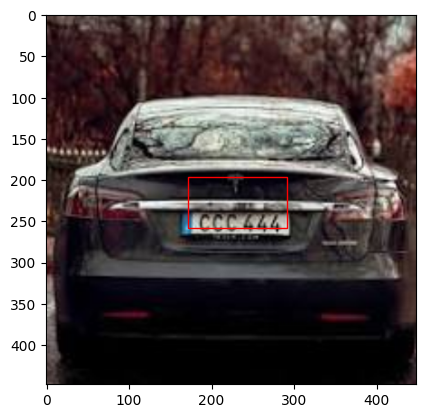

In [192]:
from utils import plot_image
plot_image(img.permute(1,2,0).to("cpu") , bboxes)